<a href="https://colab.research.google.com/github/Adamantia/covid19-mit-teamd004/blob/master/Covid19_Datathon_Team_d004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Imports


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns
from IPython.display import display, HTML
# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery
import pandas.util.testing as tm
# For exporting any dataframe in csv
from google.colab import files



### Massachusetts Summary Report

In [3]:
%%html
<div class='tableauPlaceholder' id='viz1589611004054' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;MobilityPostEffectsonCOVID-19-Massachusetts&#47;OverallSummary&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MobilityPostEffectsonCOVID-19-Massachusetts&#47;OverallSummary' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;MobilityPostEffectsonCOVID-19-Massachusetts&#47;OverallSummary&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1589611004054');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1366px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='1150px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1366px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='1150px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='1700px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Setup - bigquery


In [0]:
auth.authenticate_user()

In [0]:
project_id='mit-covid-19-datathon'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

In [0]:
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(query, project_id=project_id, verbose=False, configuration={'query':{'useLegacySql': False}})

### <font color=blue> **MA - County level data** </font>


In [26]:
### Stats America dataset
url_massachusetts = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_massachusetts.xls'

data2 = pd.read_html(url_massachusetts)
data2[0]

,Unnamed: 0,"Barnstable County, MA","Berkshire County, MA","Bristol County, MA","Dukes County, MA","Essex County, MA","Franklin County, MA","Hampden County, MA","Hampshire County, MA","Middlesex County, MA","Nantucket County, MA","Norfolk County, MA","Plymouth County, MA","Suffolk County, MA","Worcester County, MA"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,212990,124944,565217,17332,789034,70180,466372,160830,1611699,11399,706775,521202,803907,830622
2,Population Growth or Decline 2010 to 2019,-1.3 %,-4.8 %,3.1 %,4.8 %,6.2 %,-1.7 %,0.6 %,1.7 %,7.2 %,12.1 %,5.4 %,5.3 %,11.3 %,4.0 %
3,Households 2018,94292,55167,216618,6367,292659,30328,179043,58665,600032,3722,263551,186306,307870,307294
4,Labor Force (persons) 2019,115437,65320,304217,9650,429871,41318,230190,90937,929265,7661,395483,286588,461168,450332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),40194,27750,116818,3091,135741,14911,93236,23457,218287,1476,95171,99134,122750,158830
125,"Some College, No Degree",31666,16848,70051,2606,89103,9228,60147,14724,139357,1494,68162,65420,74331,97647
126,Associate Degree,15233,9043,35390,838,44103,5615,30507,9427,65854,527,36608,35254,25766,50938
127,Bachelor's Degree,40509,17408,69303,3185,126601,10480,51742,22816,303611,2381,139580,81944,135277,124040


() Merged data hospitalizations and census MA

In [28]:
## use this for further analysis
url_final_merge = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/Final%20Merge%20VP%20(1).csv'
df_final_merge = pd.read_csv(url_final_merge)
df_final_merge.head()

,Country_Region,Sub_Region1,Sub_Region2,Date,Hospital_Admissions,ICU_Admissions,retail_and_recreation,grocery_and_pharmacy,parks,transit_Stations,workplaces,residential,Population_2019,Population_Density,Median_Age,Race_Hawaiian_PacIslander,Average_Household_Size,Age_0_to_4,Age_18_to_24,Age_25_or_older,Age_25_to_44,Age_45_to_64,Age_5_to_17,Age_GE_65,Education_Bachelors,Education_LT_9thgrade,Education_GE_Bachelors,Education_GE_High_School,Education_GradProfDoc,Education_LT_HighSchool,Education_associate,Eductaion_some_collg_nodeg,Employed,Unemployed,Family_Households,For_Seasonal_or_Recreational_Use,High_School_Graduate,Hispanic_or_Latino,Households_2018,Housing_Units,Income_Household_2018,Income_PerCapita_2018,Labor_Force_2019,Living_Alone,Married_with_Children,Married_without_Children,Non_Family_Households,Non_Hispanic_or_Latino,Occupied,Owner_Occupied,Population_Growth_2019,Race_AmerInd_Alas,Race_Asian_only,Race_Black_only,Race_Mixed,Race_White_only,Renter_Occupied,Single_Parents,Total_Households,Vacant,area,N
0,United States,Massachusetts,NaN,28FEB2020,NaN,NaN,5.0,1.0,-2.0,7.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,Massachusetts,Barnstable County,28FEB2020,NaN,NaN,0.0,3.0,3.0,0.0,3.0,0.0,212990.0,537.9,52.9,0.08,2.2,3.70,7.16,77.63,17.72,30.69,11.85,29.22,19.02,1.06,42.8,95.5,14.22,2.43,7.15,14.87,52.11,2.09,0.01,29.44,18.87,2.92,44.27,76.61,32.40,35.10,54.20,14.26,5.28,16.73,16.96,97.40,44.27,35.21,-1.3,0.53,1.52,2.98,2.00,92.23,9.06,2.24,44.27,32.34,396.0,1.0
2,United States,Massachusetts,Berkshire County,28FEB2020,NaN,NaN,4.0,-5.0,-21.0,-8.0,3.0,0.0,124944.0,134.2,46.7,0.04,2.1,4.34,9.80,74.39,21.22,30.71,13.38,22.46,13.93,2.00,33.4,91.1,10.91,4.62,7.24,13.48,50.45,1.83,0.02,6.44,22.21,4.67,44.15,55.29,46.72,45.22,52.28,15.23,5.36,13.50,18.22,97.23,44.15,30.41,-4.8,0.34,1.74,2.99,2.48,92.49,13.74,3.71,44.15,11.13,931.0,2.0
3,United States,Massachusetts,Bristol County,28FEB2020,NaN,NaN,5.0,3.0,-26.0,13.0,4.0,0.0,565217.0,1016.6,41.0,0.04,2.5,5.21,9.21,69.04,24.68,28.23,15.41,16.13,12.26,5.48,28.0,84.9,7.04,4.94,6.26,12.39,51.82,2.00,0.00,0.50,20.67,7.62,38.32,41.48,11.68,9.57,53.82,10.66,6.69,11.32,13.03,91.27,38.32,23.95,3.1,0.08,2.23,4.01,2.94,83.61,14.37,3.87,38.32,3.16,556.0,3.0
4,United States,Massachusetts,Dukes County,28FEB2020,NaN,NaN,3.0,-7.0,NaN,-8.0,-14.0,NaN,17332.0,166.7,46.1,0.00,2.6,3.76,7.50,73.45,21.73,29.53,15.18,22.19,18.38,1.31,44.2,95.5,14.05,2.01,4.83,15.04,53.40,2.28,0.13,63.18,17.83,3.50,36.74,102.64,405.17,540.77,55.68,11.85,5.69,11.99,14.10,96.39,36.74,28.44,4.8,0.73,0.37,3.92,4.64,88.39,8.29,2.44,36.74,65.90,104.0,4.0


(2) Covid-19 related 

dataset: bigquery-public-data.covid19_usafacts.summary

In [29]:
df_ma1 = run_query(''' SELECT * FROM `bigquery-public-data.covid19_usafacts.summary` WHERE state='MA' ''')
df_ma1.size

11970

In [0]:
df_ma1.iloc[-15:]

,county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths
1665,25027,Worcester County,MA,25,2020-04-28,4999,229
1666,25027,Worcester County,MA,25,2020-04-29,5300,253
1667,25027,Worcester County,MA,25,2020-04-30,5550,265
1668,25027,Worcester County,MA,25,2020-05-01,5787,278
1669,25027,Worcester County,MA,25,2020-05-02,6129,292
1670,25027,Worcester County,MA,25,2020-05-03,6288,312
1671,25027,Worcester County,MA,25,2020-05-04,6471,320
1672,25027,Worcester County,MA,25,2020-05-05,6597,331
1673,25027,Worcester County,MA,25,2020-05-06,6992,365
1674,25027,Worcester County,MA,25,2020-05-07,7197,385


dataset: NYtimes nytimes/covid-19-data

In [0]:
url_nyt = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv'
df_nyt = pd.read_csv(url_nyt)
df_nyt_ma = df_nyt[(df_nyt['state']== 'Massachusetts') & (df_nyt['county'] != 'Unknown')]
df_nyt_ma.head()


,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
1158,2020-05-14,Barnstable,Massachusetts,25001.0,1111,79.0,1111.0,79.0,NaN,NaN
1159,2020-05-14,Berkshire,Massachusetts,25003.0,486,37.0,486.0,37.0,NaN,NaN
1160,2020-05-14,Bristol,Massachusetts,25005.0,5249,288.0,5249.0,288.0,NaN,NaN
1161,2020-05-14,Dukes,Massachusetts,25007.0,23,1.0,23.0,1.0,NaN,NaN
1162,2020-05-14,Essex,Massachusetts,25009.0,11703,704.0,11703.0,704.0,NaN,NaN


In [0]:
df_ma_county = df_nyt_ma.groupby(df_nyt_ma['state'])


state
Massachusetts    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

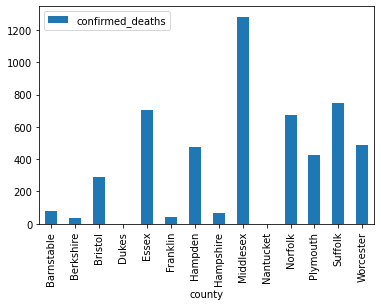

In [0]:
df_ma_county.plot(x='county', y='confirmed_deaths', kind='bar')

In [0]:
 ## run this if you want to export data in csv file
# df_nyt_ma.to_csv('df_nyt_ma.csv') 
# files.download('df_nyt_ma.csv')


* Other Data

##### Dataset: covid19_ecdc.covid_19_geographic_distribution_worldwide 


In [0]:
df_ecdc_usa = run_query('''
SELECT  date, month, year, daily_confirmed_cases, daily_deaths, confirmed_cases, deaths, countries_and_territories, geo_id, pop_data_2018 FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide` WHERE geo_id ='US' LIMIT 1000 ''')
df_ecdc_usa.head()

,date,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,pop_data_2018
0,2019-12-31,12,2019,0,0,0,0,United_States_of_America,US,327167434
1,2020-01-01,1,2020,0,0,0,0,United_States_of_America,US,327167434
2,2020-01-02,1,2020,0,0,0,0,United_States_of_America,US,327167434
3,2020-01-03,1,2020,0,0,0,0,United_States_of_America,US,327167434
4,2020-01-04,1,2020,0,0,0,0,United_States_of_America,US,327167434


In [0]:
df_ecdc_usa.size

10000

In [0]:
sort_df = df_ecdc_usa.groupby(['countries_and_territories'], as_index=False)['deaths'].sum()
# df_new = sort_df[(sort_df['deaths'] != 0) & (sort_df['deaths'] > 1000)]
sort_df.sort_values('deaths', ascending=False)

,countries_and_territories,deaths
0,United_States_of_America,1956305



ICU Bed Plots
---



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/ICU_beds_2018_2019.csv') 

fip_codes_df = pd.read_csv('https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/county_fips.csv', encoding = "ISO-8859-1")

fip_codes_df['county_name'] = fip_codes_df['county_name'].apply(lambda x: x.replace(' County', ''))

fip_codes = fip_codes_df.set_index('county_name')['fips'].to_dict()

df['county_fips_code'] = df['County'].apply(lambda x: fip_codes.get(x))

df_county = df[pd.notnull(df['county_fips_code'])]

icu_by_state = df.groupby('State')[['ICU Beds']].sum()

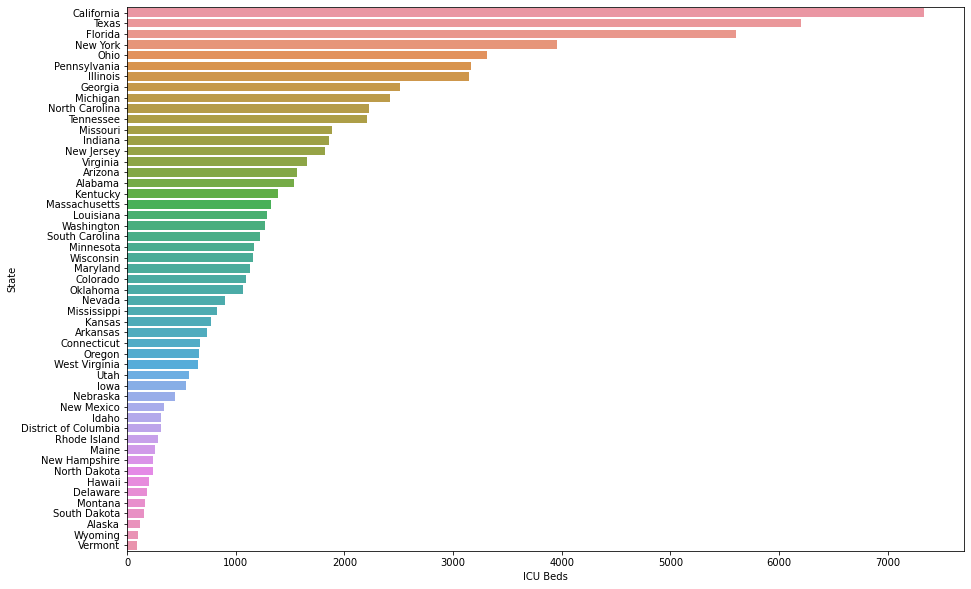

In [0]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(x='ICU Beds', y='State', data=icu_by_state.reset_index().sort_values(by=['ICU Beds'], ascending=False))

plt.show(	)

In [0]:
url_cali = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_california.xls'
url_illinois = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_illinois.xls'
url_massachusetts = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_massachusetts.xls'
url_new_jersey = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_new_jersey.xls'
url_new_york ='https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_new_york.xls'

data_cali = pd.read_html(url_cali)[0]
data_illinois = pd.read_html(url_illinois)[0]
data_massachusetts = pd.read_html(url_massachusetts)[0]
data_new_jersey = pd.read_html(url_new_jersey)[0]
data_new_york = pd.read_html(url_new_york)[0]

population_state_cali = data_cali.T[1:][1].astype(int).sum()
population_state_illinois = data_illinois.T[1:][1].astype(int).sum()
population_state_massachusetts = data_massachusetts.T[1:][1].astype(int).sum()
population_state_new_jersey = data_new_jersey.T[1:][1].astype(int).sum()
population_state_new_york = data_new_york.T[1:][1].astype(int).sum()

In [0]:
df_population = pd.DataFrame({"State":['California','Illinois', 'Massachusetts',  'New Jersey', 'New York'], "population": [population_state_cali, population_state_illinois, population_state_massachusetts, population_state_new_jersey, population_state_new_york]})
df_icu_beds = icu_by_state.reset_index()
df_icu_beds = df_icu_beds[(df_icu_beds['State'] == 'California') | (df_icu_beds['State'] == 'Illinois') | (df_icu_beds['State'] == 'New Jersey') | (df_icu_beds['State'] == 'New York') | (df_icu_beds['State'] == 'Massachusetts')]

In [0]:
df_icu_beds = df_icu_beds.sort_values(by=['State'], ascending=False)
df_population = df_population.sort_values(by=['State'], ascending=False)

In [0]:
normalized_data_100000 = np.array((df_icu_beds["ICU Beds"].astype(float)*100000))/np.array(df_population["population"].astype(float))
df_population["ICU Beds"]= df["ICU Beds"].values
df_population["normalized_data_100000"] = normalized_data_100000.tolist()
normalized_data = pd.DataFrame({'State': df_population["State"].values, 'normalized_data': df_population["normalized_data_100000"].values})

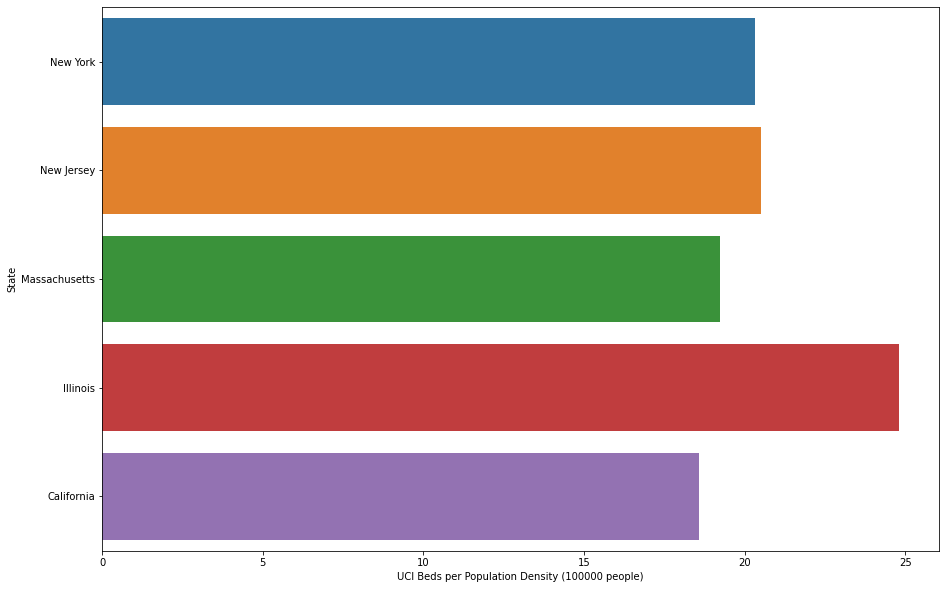

In [0]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='normalized_data', y='State', data=normalized_data)
ax.set(xlabel='UCI Beds per Population Density (100000 people)', ylabel='State')
plt.show()


Country / County Lockdown Dates
---

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/countryLockdowndates.csv', parse_dates=['Date'])
df[(df['Province'] == 'California') | (df['Province'] == 'Illinois') | (df['Province'] == 'New Jersey') | (df['Province'] == 'New York') | (df['Province'] == 'Massachusetts')]

,Country/Region,Province,Date,Type,Reference
250,US,California,2020-03-19,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
260,US,Illinois,2020-03-21,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
268,US,Massachusetts,2020-03-24,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
277,US,New Jersey,2020-03-21,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
279,US,New York,2020-03-22,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [30]:
df_covid19_usafacts = run_query('''
SELECT state,  
       SUM(confirmed_cases) as confirmed_cases,
       SUM(deaths) as deaths
FROM `bigquery-public-data.covid19_usafacts.summary`   
WHERE (
      state LIKE 'CA' or
      state LIKE 'IL' or
      state LIKE 'MA' or
      state LIKE 'NJ' or
      state LIKE 'NY'
        )
GROUP BY state
LIMIT 1000


''')
df_covid19_usafacts.head()





,state,confirmed_cases,deaths
0,CA,1814478,67140
1,IL,1842417,76716
2,MA,2045964,107697
3,NJ,4154597,225307
4,NY,11283424,778359


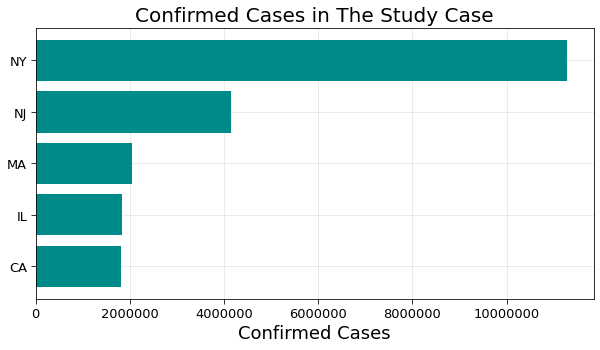

In [31]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_covid19_usafacts.sort_values('confirmed_cases')["state"].values,
         df_covid19_usafacts.sort_values('confirmed_cases')["confirmed_cases"].values,
         color="darkcyan")

plt.ticklabel_format(axis="x", style='plain')

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Confirmed Cases in The Study Case",fontsize=20)
plt.grid(alpha=0.3)

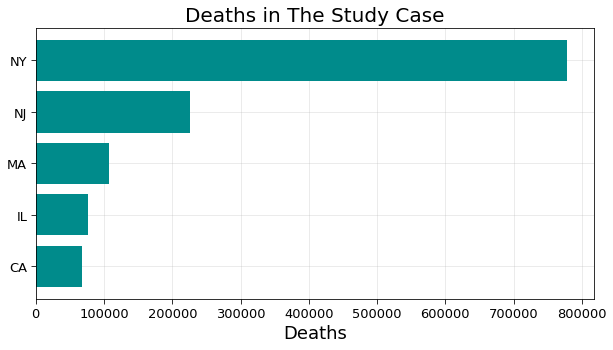

In [0]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_covid19_usafacts.sort_values('deaths')["state"].values,
         df_covid19_usafacts.sort_values('deaths')["deaths"].values,
         color="darkcyan")

plt.ticklabel_format(axis="x", style='plain')

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Deaths in The Study Case",fontsize=20)
plt.grid(alpha=0.3)

In [0]:
# query needs to be corrected 
#df_covid19_mobility_cases_deaths = run_query('''
# SELECT date,  
#        county_name,
#        deaths,
#        confirmed_cases
# FROM `mit-covid-19-datathon.Team04trackD.mobility_deaths_cases_census_merged_MA`
# ORDER BY date,  county_name
# LIMIT 100
# ''')
# df_covid19_mobility_cases_deaths.head()

In [0]:
# df_covid19_mobility_cases_deaths.plot()

# f = plt.figure(figsize=(10,5))
# ax1 = f.add_subplot(111)

# plt.axes(axisbelow=True)
# plt.barh(df_covid19_mobility_cases_deaths.sort_values('deaths')["county_name"].values,
#          df_covid19_mobility_cases_deaths.sort_values('deaths')["deaths"].values,
#          color="darkcyan")

# plt.ticklabel_format(axis="x", style='plain')

# plt.tick_params(size=5,labelsize = 13)
# plt.xlabel("Deaths",fontsize=18)
# plt.title("Deaths in The Study Case",fontsize=20)
# plt.grid(alpha=0.3)


Tableau Visualization
---

In [0]:
%%HTML
<div class='tableauPlaceholder' id='viz1589565409889' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;MobilityReport&#47;GroceryandPharma&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MobilityReport&#47;GroceryandPharma' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;MobilityReport&#47;GroceryandPharma&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1589565409889');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Merged Data

In [18]:

url_merged = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/Final%20Merge%20VP%20(1).csv'

df = pd.read_csv(url_merged)
df.head()

,Country_Region,Sub_Region1,Sub_Region2,Date,Hospital_Admissions,ICU_Admissions,retail_and_recreation,grocery_and_pharmacy,parks,transit_Stations,workplaces,residential,Population_2019,Population_Density,Median_Age,Race_Hawaiian_PacIslander,Average_Household_Size,Age_0_to_4,Age_18_to_24,Age_25_or_older,Age_25_to_44,Age_45_to_64,Age_5_to_17,Age_GE_65,Education_Bachelors,Education_LT_9thgrade,Education_GE_Bachelors,Education_GE_High_School,Education_GradProfDoc,Education_LT_HighSchool,Education_associate,Eductaion_some_collg_nodeg,Employed,Unemployed,Family_Households,For_Seasonal_or_Recreational_Use,High_School_Graduate,Hispanic_or_Latino,Households_2018,Housing_Units,Income_Household_2018,Income_PerCapita_2018,Labor_Force_2019,Living_Alone,Married_with_Children,Married_without_Children,Non_Family_Households,Non_Hispanic_or_Latino,Occupied,Owner_Occupied,Population_Growth_2019,Race_AmerInd_Alas,Race_Asian_only,Race_Black_only,Race_Mixed,Race_White_only,Renter_Occupied,Single_Parents,Total_Households,Vacant,area,N
0,United States,Massachusetts,NaN,28FEB2020,NaN,NaN,5.0,1.0,-2.0,7.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,Massachusetts,Barnstable County,28FEB2020,NaN,NaN,0.0,3.0,3.0,0.0,3.0,0.0,212990.0,537.9,52.9,0.08,2.2,3.70,7.16,77.63,17.72,30.69,11.85,29.22,19.02,1.06,42.8,95.5,14.22,2.43,7.15,14.87,52.11,2.09,0.01,29.44,18.87,2.92,44.27,76.61,32.40,35.10,54.20,14.26,5.28,16.73,16.96,97.40,44.27,35.21,-1.3,0.53,1.52,2.98,2.00,92.23,9.06,2.24,44.27,32.34,396.0,1.0
2,United States,Massachusetts,Berkshire County,28FEB2020,NaN,NaN,4.0,-5.0,-21.0,-8.0,3.0,0.0,124944.0,134.2,46.7,0.04,2.1,4.34,9.80,74.39,21.22,30.71,13.38,22.46,13.93,2.00,33.4,91.1,10.91,4.62,7.24,13.48,50.45,1.83,0.02,6.44,22.21,4.67,44.15,55.29,46.72,45.22,52.28,15.23,5.36,13.50,18.22,97.23,44.15,30.41,-4.8,0.34,1.74,2.99,2.48,92.49,13.74,3.71,44.15,11.13,931.0,2.0
3,United States,Massachusetts,Bristol County,28FEB2020,NaN,NaN,5.0,3.0,-26.0,13.0,4.0,0.0,565217.0,1016.6,41.0,0.04,2.5,5.21,9.21,69.04,24.68,28.23,15.41,16.13,12.26,5.48,28.0,84.9,7.04,4.94,6.26,12.39,51.82,2.00,0.00,0.50,20.67,7.62,38.32,41.48,11.68,9.57,53.82,10.66,6.69,11.32,13.03,91.27,38.32,23.95,3.1,0.08,2.23,4.01,2.94,83.61,14.37,3.87,38.32,3.16,556.0,3.0
4,United States,Massachusetts,Dukes County,28FEB2020,NaN,NaN,3.0,-7.0,NaN,-8.0,-14.0,NaN,17332.0,166.7,46.1,0.00,2.6,3.76,7.50,73.45,21.73,29.53,15.18,22.19,18.38,1.31,44.2,95.5,14.05,2.01,4.83,15.04,53.40,2.28,0.13,63.18,17.83,3.50,36.74,102.64,405.17,540.77,55.68,11.85,5.69,11.99,14.10,96.39,36.74,28.44,4.8,0.73,0.37,3.92,4.64,88.39,8.29,2.44,36.74,65.90,104.0,4.0


In [21]:
df1 = df.groupby(['Sub_Region2']).mean()
df1

,Hospital_Admissions,ICU_Admissions,retail_and_recreation,grocery_and_pharmacy,parks,transit_Stations,workplaces,residential,Population_2019,Population_Density,Median_Age,Race_Hawaiian_PacIslander,Average_Household_Size,Age_0_to_4,Age_18_to_24,Age_25_or_older,Age_25_to_44,Age_45_to_64,Age_5_to_17,Age_GE_65,Education_Bachelors,Education_LT_9thgrade,Education_GE_Bachelors,Education_GE_High_School,Education_GradProfDoc,Education_LT_HighSchool,Education_associate,Eductaion_some_collg_nodeg,Employed,Unemployed,Family_Households,For_Seasonal_or_Recreational_Use,High_School_Graduate,Hispanic_or_Latino,Households_2018,Housing_Units,Income_Household_2018,Income_PerCapita_2018,Labor_Force_2019,Living_Alone,Married_with_Children,Married_without_Children,Non_Family_Households,Non_Hispanic_or_Latino,Occupied,Owner_Occupied,Population_Growth_2019,Race_AmerInd_Alas,Race_Asian_only,Race_Black_only,Race_Mixed,Race_White_only,Renter_Occupied,Single_Parents,Total_Households,Vacant,area,N
Sub_Region2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barnstable County,26.791667,7.333333,-30.084507,-9.929577,44.380282,-28.183099,-31.788732,12.126761,212990.0,537.9,52.9,0.08,2.2,3.70,7.16,77.63,17.72,30.69,11.85,29.22,19.02,1.06,42.8,95.5,14.22,2.43,7.15,14.87,52.11,2.09,0.01,29.44,18.87,2.92,44.27,76.61,32.40,35.10,54.20,14.26,5.28,16.73,16.96,97.40,44.27,35.21,-1.3,0.53,1.52,2.98,2.00,92.23,9.06,2.24,44.27,32.34,396.0,1.0
Berkshire County,11.250000,3.666667,-27.211268,-8.605634,6.162791,-33.901408,-29.830986,11.704225,124944.0,134.2,46.7,0.04,2.1,4.34,9.80,74.39,21.22,30.71,13.38,22.46,13.93,2.00,33.4,91.1,10.91,4.62,7.24,13.48,50.45,1.83,0.02,6.44,22.21,4.67,44.15,55.29,46.72,45.22,52.28,15.23,5.36,13.50,18.22,97.23,44.15,30.41,-4.8,0.34,1.74,2.99,2.48,92.49,13.74,3.71,44.15,11.13,931.0,2.0
Bristol County,225.041667,41.375000,-25.661972,-5.563380,18.085714,-35.769231,-32.577465,13.591549,565217.0,1016.6,41.0,0.04,2.5,5.21,9.21,69.04,24.68,28.23,15.41,16.13,12.26,5.48,28.0,84.9,7.04,4.94,6.26,12.39,51.82,2.00,0.00,0.50,20.67,7.62,38.32,41.48,11.68,9.57,53.82,10.66,6.69,11.32,13.03,91.27,38.32,23.95,3.1,0.08,2.23,4.01,2.94,83.61,14.37,3.87,38.32,3.16,556.0,3.0
Dukes County,0.166667,0.041667,-32.861111,-9.394737,NaN,-42.119048,-36.049180,NaN,17332.0,166.7,46.1,0.00,2.6,3.76,7.50,73.45,21.73,29.53,15.18,22.19,18.38,1.31,44.2,95.5,14.05,2.01,4.83,15.04,53.40,2.28,0.13,63.18,17.83,3.50,36.74,102.64,405.17,540.77,55.68,11.85,5.69,11.99,14.10,96.39,36.74,28.44,4.8,0.73,0.37,3.92,4.64,88.39,8.29,2.44,36.74,65.90,104.0,4.0
Essex County,349.916667,73.458333,-31.197183,-15.014085,35.281690,-37.816901,-38.042254,16.154930,789034.0,1584.4,40.8,0.01,2.6,5.59,9.24,68.31,23.89,28.28,15.84,16.14,16.05,3.87,39.4,89.3,10.84,3.47,5.59,11.29,52.86,1.62,0.00,0.72,17.20,20.15,37.09,39.54,9.68,8.56,54.48,10.21,7.19,10.86,12.31,78.84,37.09,23.77,6.2,0.24,3.41,3.97,2.86,79.28,13.32,3.50,37.09,2.45,498.0,5.0
Franklin County,6.333333,0.708333,-29.549296,-10.521127,-37.000000,-39.918919,-33.450704,15.098039,70180.0,100.0,46.1,0.09,2.2,4.50,7.36,75.82,24.01,31.34,13.40,20.47,14.93,1.54,37.2,93.1,13.26,3.68,8.00,13.15,57.29,1.58,0.04,2.08,21.25,3.94,43.21,48.55,84.06,77.93,58.87,13.62,6.29,13.38,17.56,97.13,43.21,29.96,-1.7,0.31,1.66,1.53,2.28,94.11,13.25,3.02,43.21,5.33,702.0,6.0
Hampden County,189.041667,29.333333,-26.802817,-5.000000,30.591549,-27.774648,-32.478873,12.084507,466372.0,754.6,38.9,0.02,2.5,5.67,10.70,67.82,24.61,27.08,16.40,16.13,11.09,4.00,27.2,85.3,7.33,5.97,6.54,12.90,47.34,2.02,0.01,0.36,19.99,24.76,38.39,41.50,11.30,10.98,49.36,11.47,5.66,10.14,13.75,75.83,38.39,23.36,0.6,0.27,2.37,8.83,2.81,81.68,15.03,4.78,38.39,3.11,618.0,7.0
Hampshire County,19.125000,5.125000,-34.619718,-11.619718,21.307692,-49.354839,-37.436620,15.149254,160830.0,304.0,36.3,0.04,2.3,3.51,23.28,61.79,20.49,25.31,11.62,15.99,14.19,1.07,46.5,94.4,14.55,2.39,5.86,9.16,55.01,1.53,0.01,0.91,14.58,5.52,36.48,39.59,46.29,32.94,56.54,11.15,5.58,10.47,15.10,94.68,36.48,23.99,1.7,0.17,5